# Exploratory Data Analysis (EDA) & Machine Learning Algorithms (MLA)
- Uncover patterns, trends, relationships

In [2]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors
import plotly.express as px

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tabulate import tabulate

In [2]:
df_2 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\IGN VIdeo Game Rarings\Python\df_2.csv', index_col=False, delimiter=',')

## regression model

In [3]:
# Load your DataFrame df_2

# Choose features and target variable
X = df_2[['release_year', 'release_month', 'release_day']]  # Features
y = df_2['score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.892248908094975


## classification model:

In [4]:
# 1. Data Preprocessing
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_2[['platform', 'genre']])

# Concatenate encoded features with numerical features
X = pd.concat([df_encoded, df_2[['score', 'release_year', 'release_month', 'release_day']]], axis=1)
y = df_2['score_phrase']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Selection and Training
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# 4. Model Evaluation
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Amazing       0.98      1.00      0.99       343
       Awful       0.74      0.57      0.64       132
         Bad       0.79      0.83      0.81       242
    Disaster       0.00      0.00      0.00         1
        Good       1.00      1.00      1.00       959
       Great       1.00      1.00      1.00       942
 Masterpiece       1.00      0.45      0.62        11
    Mediocre       0.88      0.95      0.91       383
        Okay       0.96      1.00      0.98       610
     Painful       0.36      0.20      0.26        69
  Unbearable       0.25      0.06      0.10        17

    accuracy                           0.95      3709
   macro avg       0.72      0.64      0.66      3709
weighted avg       0.94      0.95      0.94      3709



C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Clustering

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\clust

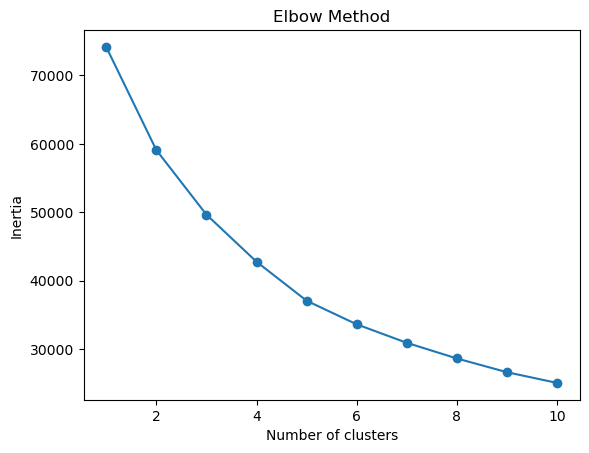

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


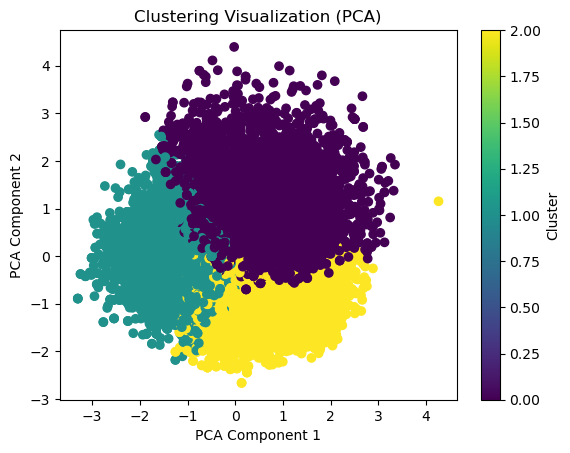

In [5]:
# Data preprocessing
df_numerical = df_2.drop(columns=['title', 'score_phrase', 'platform', 'genre'])  # Select numerical features
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Choosing the number of clusters (example with the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_numerical_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, choose the appropriate number of clusters and train the model
k = 3  # Example: Choose 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_numerical_scaled)

# Add cluster labels to the DataFrame
df_2['cluster'] = kmeans.labels_

# Visualization (example with PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_numerical_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization (PCA)')
plt.colorbar(label='Cluster')
plt.show()

## Dimensionality Reduction

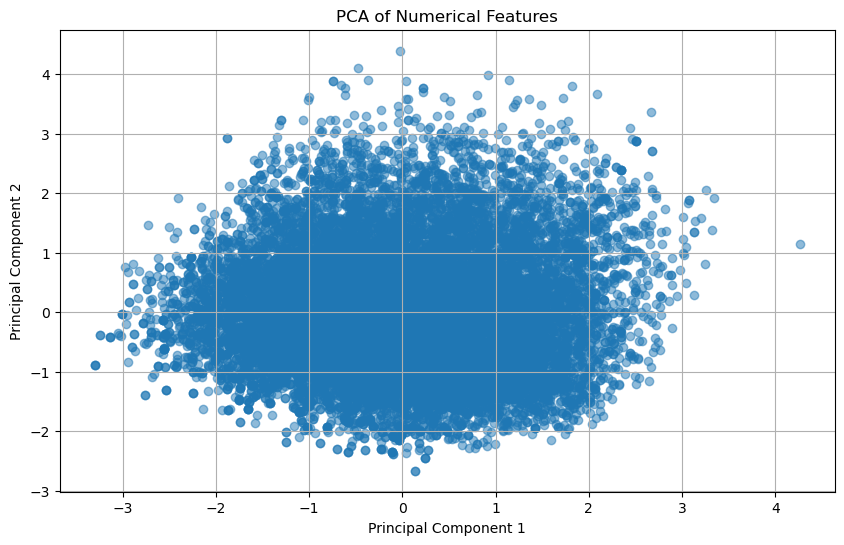

In [6]:
# Extract numerical columns for PCA
numerical_columns = ['score', 'release_year', 'release_month', 'release_day']
X = df_2[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # We choose 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add the non-numerical columns back to the PCA DataFrame
pca_df[['title', 'score_phrase', 'platform', 'genre']] = df_2[['title', 'score_phrase', 'platform', 'genre']]

# Visualize the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Numerical Features')
plt.grid(True)
plt.show()